In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Read the data.
df = pd.read_csv('data_assignment.csv')

# Show the number of rows in the data frame.
pd.set_option("display.max_rows", 20, "display.max_columns", None)

# Display the head of the data.
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [2]:
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()
df['Date'] = df['Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
### Part 1.1
# Choose your two favourite cities/locations.
location1 = "Sydney"
location2 = "Brisbane"

In [4]:
## Which city has more jobs? How many jobs each type (casual, fulltime, etc.) are there in each city?

# Return number of job listings at location 1
jobs_loc1 = df.loc[df['Location'] == location1]
print("There are", jobs_loc1.shape[0], "job listings in", location1, end="\n\n")

# Job listings by each type in location 1
types_loc1 = jobs_loc1.groupby(['JobType'])
print(types_loc1.size(), end="\n\n")

# Return number of jobs listings at location 2
jobs_loc2 = df.loc[df['Location'] == location2]
print("There are", jobs_loc2.shape[0], "job listings in", location2, end="\n\n")

# Job listings by each type in location 2
types_loc2 = jobs_loc2.groupby(['JobType'])
print(types_loc2.size())

There are 46357 job listings in Sydney

JobType
Casual/Vacation     2542
Contract/Temp       8420
Full Time          32267
Part Time           2277
dtype: int64

There are 16538 job listings in Brisbane

JobType
Casual/Vacation     1543
Contract/Temp       3164
Full Time          10431
Part Time            988
dtype: int64


In [5]:
## In each city, which are top 5 job sectors? How many jobs are there in each sector?

# Top sectors in location 1
top_loc1 = df.loc[df['Location'] == location1].groupby('Classification').size().sort_values(ascending = False).head(5)
print("Top 5 job sectors in", location1, end="\n\n")
print(top_loc1, end="\n\n")

# Top sectors in location 2
top_loc2 = df.loc[df['Location'] == location2].groupby('Classification').size().sort_values(ascending = False).head(5)
print("Top 5 job sectors in", location2, end="\n\n")
print(top_loc2)


Top 5 job sectors in Sydney

Classification
Information & Communication Technology    6999
Trades & Services                         3181
Accounting                                3105
Hospitality & Tourism                     3081
Manufacturing, Transport & Logistics      2536
dtype: int64

Top 5 job sectors in Brisbane

Classification
Information & Communication Technology    2041
Trades & Services                         1627
Healthcare & Medical                      1341
Manufacturing, Transport & Logistics      1338
Hospitality & Tourism                     1032
dtype: int64


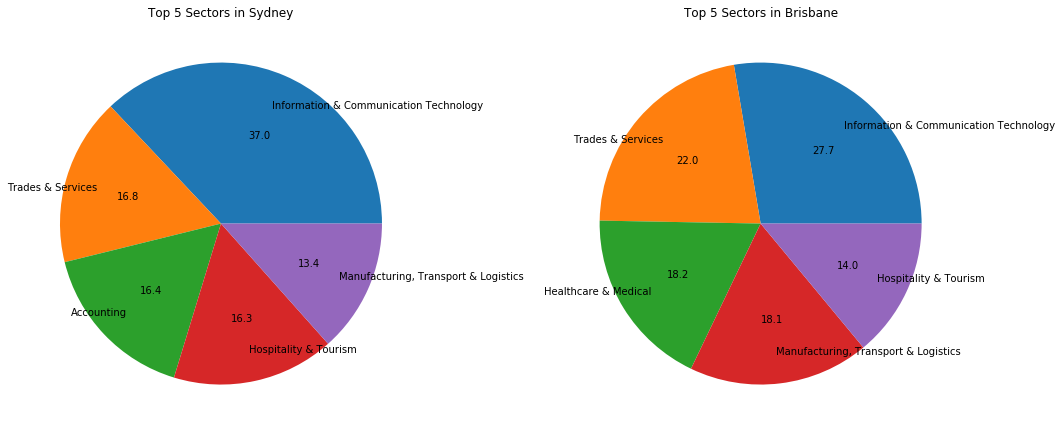

In [6]:
## Visualise the top 5 job sectors in pie chart for each city

# Create the new figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15), subplot_kw={'aspect':'equal'})

# Set the chart parameters
ax1.set_title('Top 5 Sectors in ' + location1)
ax2.set_title('Top 5 Sectors in ' + location2)

# Plot the data in a pie chart
ax1.pie(top_loc1, labels = top_loc1.keys(), autopct = '%1.1f', labeldistance=0.8)
ax2.pie(top_loc2, labels = top_loc2.keys(), autopct = '%1.1f', labeldistance=0.8)

plt.tight_layout()

In [7]:
## In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?

# Salary range count in location 1
salary_loc1 = jobs_loc1[['LowestSalary', 'HighestSalary']].groupby(["LowestSalary", "HighestSalary"]).size()
print("Jobs according to salary range in", location1, end="\n\n")
print(salary_loc1, end="\n\n")

# Salary range count in location 2
salary_loc2 = jobs_loc2[['LowestSalary', 'HighestSalary']].groupby(["LowestSalary", "HighestSalary"]).size()
print("Job according to salary range in", location2, end="\n\n")
print(salary_loc2)

# TODO: Which city is more well-paid?

Jobs according to salary range in Sydney

LowestSalary  HighestSalary
0             30               8427
30            40               3035
40            50               4406
50            60               3751
60            70               4152
70            80               3850
80            100              3702
100           120              4330
120           150              4228
150           200              4718
200           250              1758
dtype: int64

Job according to salary range in Brisbane

LowestSalary  HighestSalary
0             30               2962
30            40               1192
40            50               2271
50            60               1481
60            70               1611
70            80               1384
80            100              1317
100           120              1494
120           150              1076
150           200              1202
200           250               548
dtype: int64


In [8]:
## List top 5 companies in each city? Which sectors do they belong to?

def enum_sectors(data):
    for i, (index, row) in enumerate(data.iterrows()):
        print("{}.".format(i + 1), row['Company'])
        sectors = jobs_loc1.loc[df['Company'] == row['Company']]['Classification'].dropna().unique().tolist()
        print("Sectors: ", end="")
        print(sectors, sep=",", end="\n\n")


# Get top companies in locations
comp_loc1 = jobs_loc1.groupby('Company').size().reset_index(name='Count').sort_values(['Count'], ascending = False).head(5)
comp_loc2 = jobs_loc2.groupby('Company').size().reset_index(name='Count').sort_values(['Count'], ascending = False).head(5)

# List top companies in locations with their sectors
print("Top companies in", location1, "according to number of Job Listings", end="\n")
print("-" * 10)
enum_sectors(comp_loc1)
print("\n")

print("Top companies in", location2, "according to number of Job Listings", end="\n")
print("-" * 10)
enum_sectors(comp_loc2)

Top companies in Sydney according to number of Job Listings
----------
1. Jora Local
Sectors: ['Hospitality & Tourism', 'Trades & Services', 'Retail & Consumer Products']

2. Robert Walters
Sectors: ['Information & Communication Technology', 'Accounting', 'Banking & Financial Services', 'Call Centre & Customer Service', 'Administration & Office Support', 'Legal', 'Sales', 'Human Resources & Recruitment', 'Manufacturing, Transport & Logistics', 'Marketing & Communications', 'Consulting & Strategy', 'Engineering', 'Real Estate & Property', 'Insurance & Superannuation']

3. Design & Build
Sectors: ['Construction', 'Trades & Services', 'Administration & Office Support', 'Real Estate & Property', 'Human Resources & Recruitment', 'Marketing & Communications', 'Sales', 'Design & Architecture', 'Engineering', 'Manufacturing, Transport & Logistics']

4. Bluefin Resources Pty Limited
Sectors: ['Information & Communication Technology', 'Insurance & Superannuation', 'Banking & Financial Services',

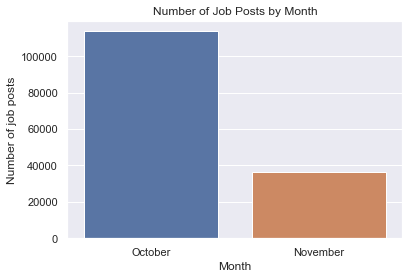

In [9]:
###Part 1.2
#Visualise the number of job posts by month
posts_month = df.groupby(df['Date'].dt.strftime('%B'))['Title'].count().sort_index(ascending=False)
sns.set()
ax = sns.barplot(x= posts_month.keys(), y=posts_month)
ax.set(xlabel='Month', ylabel='Number of job posts')
plt.title('Number of Job Posts by Month')
plt.show()

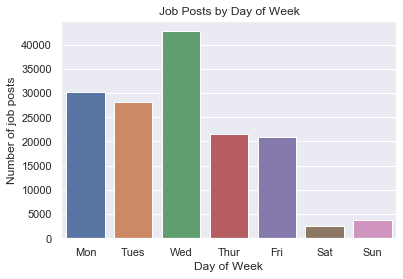

In [10]:
#Visualise the number of job posts by day of week
posts_month = df.groupby(df['Date'].dt.dayofweek)['Title'].count()
idx = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'] 
posts_month.index = idx
ax = sns.barplot(x= posts_month.keys(), y=posts_month)
ax.set(xlabel='Day of Week', ylabel='Number of job posts')
plt.title('Job Posts by Day of Week')
plt.show()

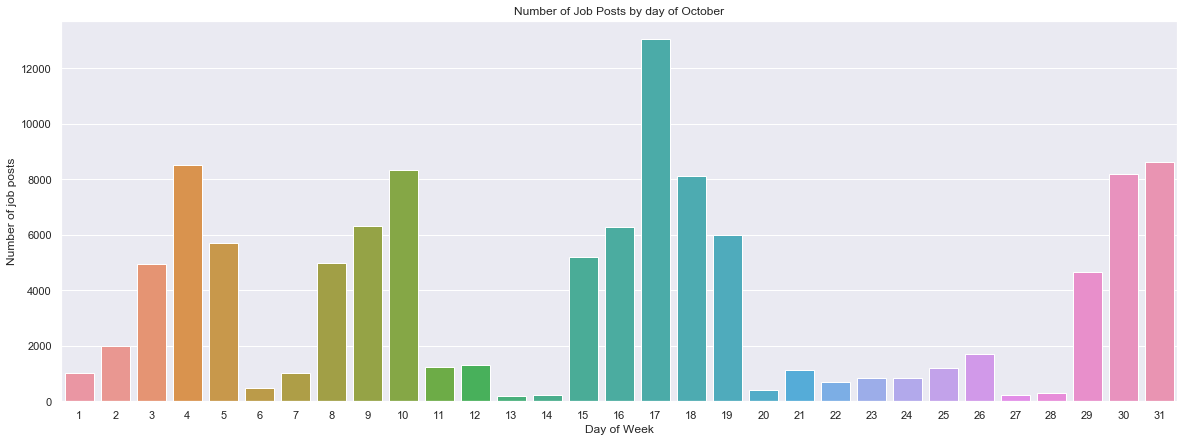

In [11]:
#Visualise the number of job posts by day of the month in October
plt.figure(figsize=(20,7)) 
october_posts = df[pd.to_datetime(df['Date']).dt.month == 10]
posts_month = october_posts.groupby(october_posts['Date'].dt.strftime('%D'))['Title'].count()
idx = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31] 
posts_month.index = idx
ax = sns.barplot(x= posts_month.keys(), y=posts_month)
ax.set(xlabel='Day of Week', ylabel='Number of job posts')
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Number of Job Posts by day of October')
plt.show()

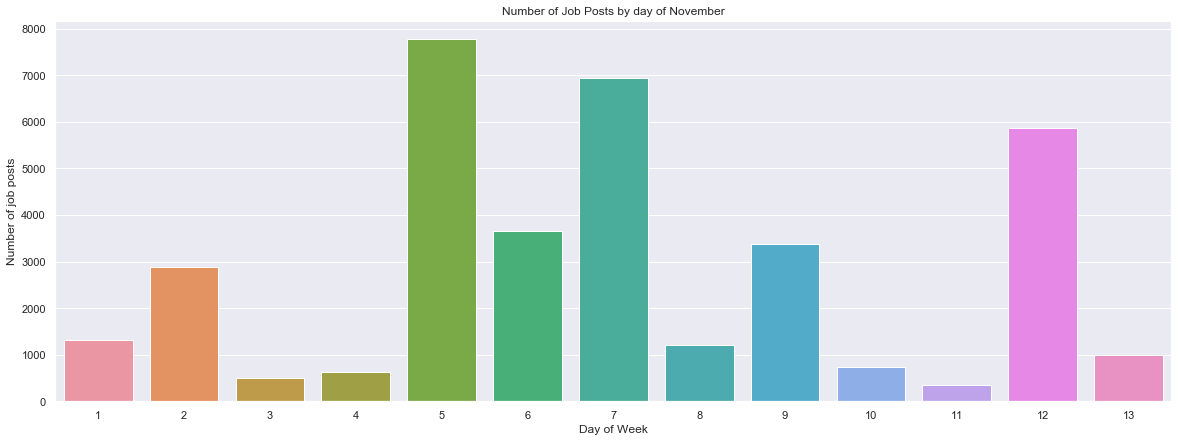

In [12]:
#Visualise the number of job posts by day of the month in November
plt.figure(figsize=(20,7)) 
november_posts = df[pd.to_datetime(df['Date']).dt.month == 11]
posts_month = november_posts.groupby(november_posts['Date'].dt.strftime('%D'))['Title'].count()
idx = [1,2,3,4,5,6,7,8,9,10,11,12,13] 
posts_month.index = idx
ax = sns.barplot(x= posts_month.keys(), y=posts_month)
ax.set(xlabel='Day of Week', ylabel='Number of job posts')
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Number of Job Posts by day of November')
plt.show()

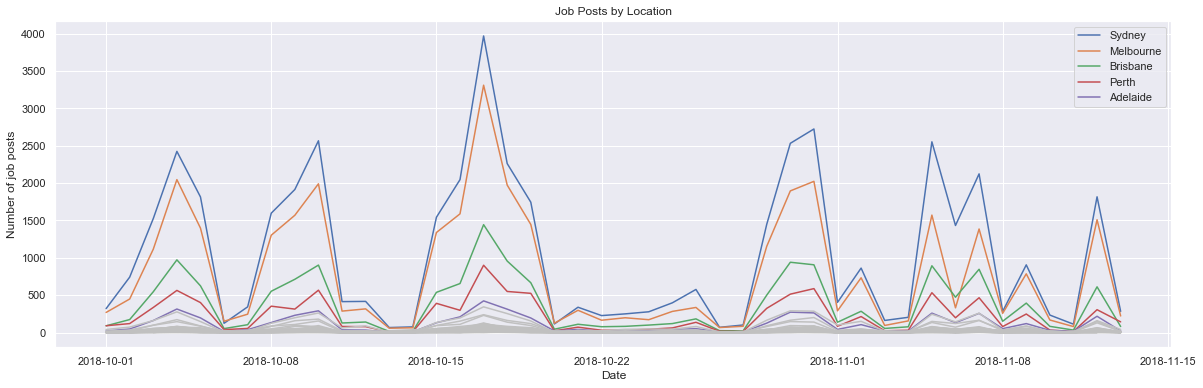

In [13]:
#Visualise trending of the job postings for the big cities.

posts_city = df.groupby(df['Location'])['Title'].count().sort_values(ascending=False)

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize = fig_dims)

for i in range(0, len(posts_city)):
    loc_date_jobs = df.loc[df['Location'] == posts_city.keys()[i]].groupby('Date').agg({'Location': ['count']})
    if i > 4:
        plt.plot(loc_date_jobs, color='silver')
    else:
        plt.plot(loc_date_jobs)

plt.legend([posts_city.keys()[i] for i in range(0,5)])

_ = ax.set(title='Job Posts by Location', xlabel='Date', ylabel='Number of job posts')


In [14]:
#Define moving average

def moving_average(df, k):
    moving_average = []
    for m in range(1, len(df)+1):
        if m < k:
            predict = float('nan')
        else:
            history = df[m-k:m]
            predict = history.mean()
        moving_average.append(predict)
    return moving_average

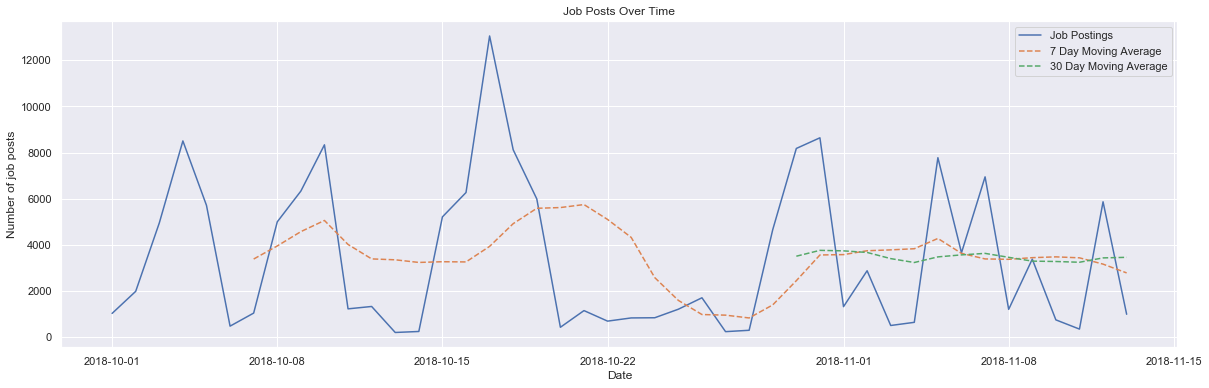

In [15]:
#Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart.

date_postings = df[['Id', 'Date']].groupby('Date').count()

ma_7 = moving_average(date_postings, 7)
ma_30 = moving_average(date_postings, 30)

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize = fig_dims)

plt.plot(date_postings)
plt.plot(date_postings['Id'].keys(), ma_7, '--')
plt.plot(date_postings['Id'].keys(), ma_30, '--')

plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'])

_ = ax.set(title='Job Posts Over Time', xlabel='Date', ylabel='Number of job posts')

In [16]:
def moving_average_alternative(df, k):
    moving_average = []
    for m in range(1, len(df)+1):
        if m < k:
            history = df[0:m]
            predict = history.mean()
        else:
            history = df[m-k:m]
            predict = history.mean()
        moving_average.append(predict)
    return moving_average

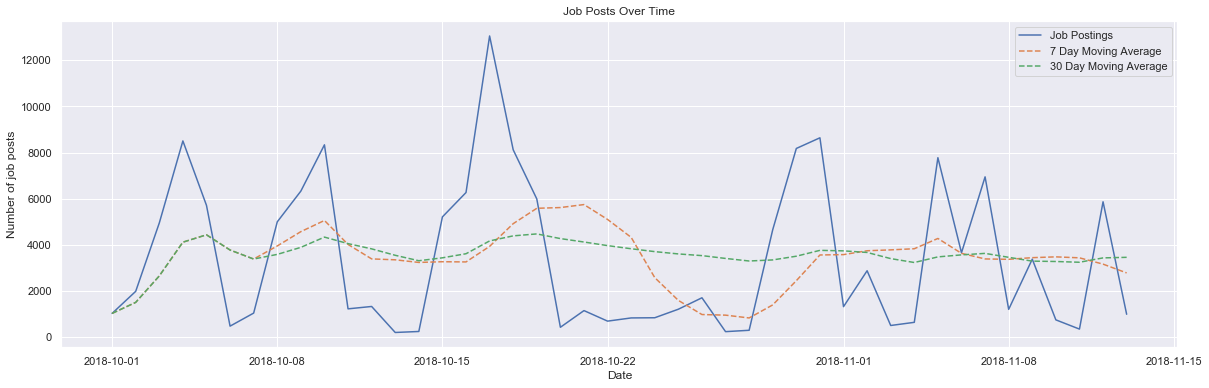

In [17]:
date_postings = df[['Id', 'Date']].groupby('Date').count()

ma_7 = moving_average_alternative(date_postings, 7)
ma_30 = moving_average_alternative(date_postings, 30)

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize = fig_dims)

plt.plot(date_postings)
plt.plot(date_postings['Id'].keys(), ma_7, '--')
plt.plot(date_postings['Id'].keys(), ma_30, '--')

plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'])

_ = ax.set(title='Job Posts Over Time', xlabel='Date', ylabel='Number of job posts')

In [18]:
#Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english', max_features=500)

features = tfidf.fit(df['Requirement'].loc[df['Classification'] == 'Information & Communication Technology'].to_list())
corpus_tf_idf = tfidf.transform(df['Requirement'].loc[df['Classification'] == 'Information & Communication Technology'].to_list()) 

sum_words = corpus_tf_idf.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])


[('opportunity', 617.4735314496552), ('join', 607.7457463401777), ('contract', 606.9671017180993), ('team', 582.9469587925814), ('business', 518.8158465193815)]


In [19]:
#Section 2 Scenario 1
#job sectors in locations near and including Brisbane
location1 = "Brisbane"
location2 = "Gold Coast"
location3 = "Sunshine Coast"
location4 = "Gladstone & Central QLD"
location5 = "Rockhampton & Capricorn Coast"
# Return number of jobs listings at each location with an income greater or equal to 80 thousand dollars
jobs_loc1 = df.loc[(df['Location'] == location1) & (df['LowestSalary'] >=80)]
print("There are", jobs_loc1.shape[0], "job listings in", location1, end="\n\n")
jobs_loc2 = df.loc[(df['Location' ] == location2) & (df['LowestSalary'] >=80)]
print("There are", jobs_loc2.shape[0], "job listings in", location2, end="\n\n")
jobs_loc3 = df.loc[(df['Location'] == location3) & (df['LowestSalary'] >=80)]
print("There are", jobs_loc3.shape[0], "job listings in", location3, end="\n\n")
jobs_loc4 = df.loc[(df['Location'] == location4) & (df['LowestSalary'] >=80)]
print("There are", jobs_loc4.shape[0], "job listings in", location4, end="\n\n")
jobs_loc5 = df.loc[(df['Location'] == location5) & (df['LowestSalary'] >=80)]
print("There are", jobs_loc5.shape[0], "job listings in", location5, end="\n\n")


There are 5637 job listings in Brisbane

There are 453 job listings in Gold Coast

There are 179 job listings in Sunshine Coast

There are 209 job listings in Gladstone & Central QLD

There are 189 job listings in Rockhampton & Capricorn Coast



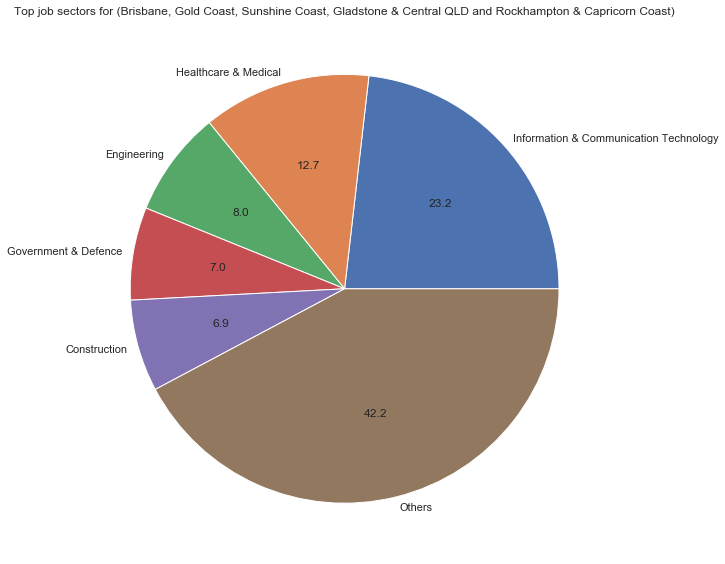

In [20]:
#pie chart to display the top 5 job sectors across all locations
fig, (ax1) = plt.subplots(1, 1, figsize=(15,8), subplot_kw={'aspect':'equal'})

ax1.set_title('Top job sectors for (' + location1 +', '+location2+', '+location3+', '+location4+' and '+location5 + ')')

top_job_sectors = df[(df['Location'].isin([location1,location2,location3,location4,location5])) & (df['LowestSalary'] >=80) ]
top_job_sectors = top_job_sectors.groupby('Classification').count()
top_job_sectors['Classification'] = top_job_sectors.index
top_job_sectors['Count'] = top_job_sectors["Id"]
top_job_sectors = top_job_sectors.sort_values(by=["Count"], ascending =False)
top_job_sector_all = top_job_sectors[:5].copy()

new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [top_job_sectors["Count"][5:].sum()]
})

top_job_sector_all = pd.concat([top_job_sector_all, new_row],sort=False)
#plot pie chart
ax1.pie(top_job_sector_all["Count"], labels=top_job_sector_all["Classification"], autopct = '%1.1f', labeldistance=1.05)
plt.tight_layout()

In [21]:
#return top 5 job sectors for each location
#top 5 job sectors for Location 1
top_loc1_job_sectors = df[(df['Location'] == location1) & (df['LowestSalary'] >=80) ]
top_loc1_job_sectors = top_loc1_job_sectors.groupby('Classification').count()
top_loc1_job_sectors['Classification'] = top_loc1_job_sectors.index
top_loc1_job_sectors['Count'] = top_loc1_job_sectors["Id"]
top_loc1_job_sectors = top_loc1_job_sectors.sort_values(by=["Count"], ascending =False)
top_loc1_job_sectors_all = top_loc1_job_sectors[:5].copy()

new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [top_loc1_job_sectors["Count"][5:].sum()]
})
top_loc1_job_sectors_all = pd.concat([top_loc1_job_sectors_all, new_row],sort=False)

#top 5 job sectors for Location 2
top_loc2_job_sectors = df[(df['Location'] == location2) & (df['LowestSalary'] >=80) ]
top_loc2_job_sectors = top_loc2_job_sectors.groupby('Classification').count()
top_loc2_job_sectors['Classification'] = top_loc2_job_sectors.index
top_loc2_job_sectors['Count'] = top_loc2_job_sectors["Id"]
top_loc2_job_sectors = top_loc2_job_sectors.sort_values(by=["Count"], ascending =False)
top_loc2_job_sectors_all = top_loc2_job_sectors[:5].copy()

new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [top_loc2_job_sectors["Count"][5:].sum()]
})
top_loc2_job_sectors_all = pd.concat([top_loc2_job_sectors_all, new_row],sort=False)

#top 5 job sectors for Location 3
top_loc3_job_sectors = df[(df['Location'] == location3) & (df['LowestSalary'] >=80) ]
top_loc3_job_sectors = top_loc3_job_sectors.groupby('Classification').count()
top_loc3_job_sectors['Classification'] = top_loc3_job_sectors.index
top_loc3_job_sectors['Count'] = top_loc3_job_sectors["Id"]
top_loc3_job_sectors = top_loc3_job_sectors.sort_values(by=["Count"], ascending =False)
top_loc3_job_sectors_all = top_loc3_job_sectors[:5].copy()

new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [top_loc3_job_sectors["Count"][5:].sum()]
})
top_loc3_job_sectors_all = pd.concat([top_loc3_job_sectors_all, new_row],sort=False)

#top 5 job sectors for Location 4
top_loc4_job_sectors = df[(df['Location'] == location4) & (df['LowestSalary'] >=80) ]
top_loc4_job_sectors = top_loc4_job_sectors.groupby('Classification').count()
top_loc4_job_sectors['Classification'] = top_loc4_job_sectors.index
top_loc4_job_sectors['Count'] = top_loc4_job_sectors["Id"]
top_loc4_job_sectors = top_loc4_job_sectors.sort_values(by=["Count"], ascending =False)
top_loc4_job_sectors_all = top_loc4_job_sectors[:5].copy()

new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [top_loc4_job_sectors["Count"][5:].sum()]
})
top_loc4_job_sectors_all = pd.concat([top_loc4_job_sectors_all, new_row],sort=False)

#top 5 job sectors for Location 5
top_loc5_job_sectors = df[(df['Location'] == location5) & (df['LowestSalary'] >=80) ]
top_loc5_job_sectors = top_loc5_job_sectors.groupby('Classification').count()
top_loc5_job_sectors['Classification'] = top_loc5_job_sectors.index
top_loc5_job_sectors['Count'] = top_loc5_job_sectors["Id"]
top_loc5_job_sectors = top_loc5_job_sectors.sort_values(by=["Count"], ascending =False)
top_loc5_job_sectors_all = top_loc5_job_sectors[:5].copy()

new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [top_loc5_job_sectors["Count"][5:].sum()]
})
top_loc5_job_sectors_all = pd.concat([top_loc5_job_sectors_all, new_row],sort=False)


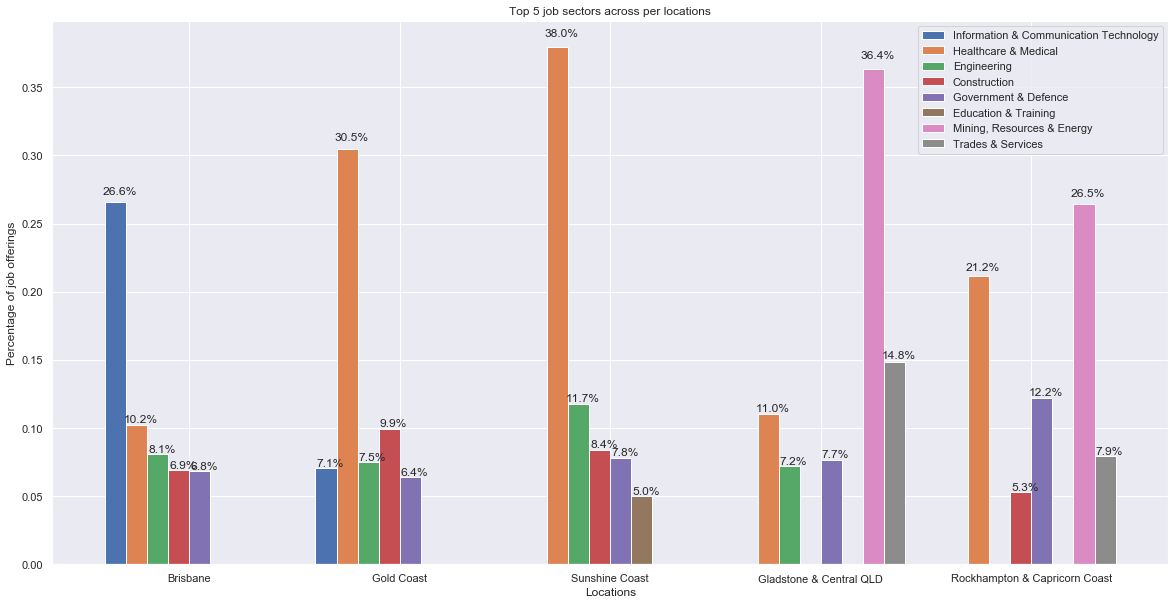

In [22]:
#get percentages of each job
percentage_loc1 = (top_loc1_job_sectors_all["Count"] / top_loc1_job_sectors_all["Count"].sum())
percentage_loc2 = (top_loc2_job_sectors_all["Count"] / top_loc2_job_sectors_all["Count"].sum())
percentage_loc3 = (top_loc3_job_sectors_all["Count"] / top_loc3_job_sectors_all["Count"].sum())
percentage_loc4 = (top_loc4_job_sectors_all["Count"] / top_loc4_job_sectors_all["Count"].sum())
percentage_loc5 = (top_loc5_job_sectors_all["Count"] / top_loc5_job_sectors_all["Count"].sum())

locations = [location1,location2,location3,location4,location5]

#create list of percentages for each classification for each location
jobs = [percentage_loc1[0:5], percentage_loc2[0:5],percentage_loc3[0:5],percentage_loc4[0:5],percentage_loc5[0:5]]
top_5_jobs_all_loc = pd.DataFrame(jobs,index=locations)

#plot bar chart
ax = top_5_jobs_all_loc.plot(kind='bar',figsize=(20,10),width = 0.8,edgecolor=None, rot = 0)
plt.title('Top 5 job sectors across per locations')
plt.xlabel('Locations')
plt.ylabel('Percentage of job offerings')
# Add percentage labels to bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height >0:
        ax.annotate(f'{height:.1%}', (x +0.02+ width/2, y + height*1.02), ha='center')

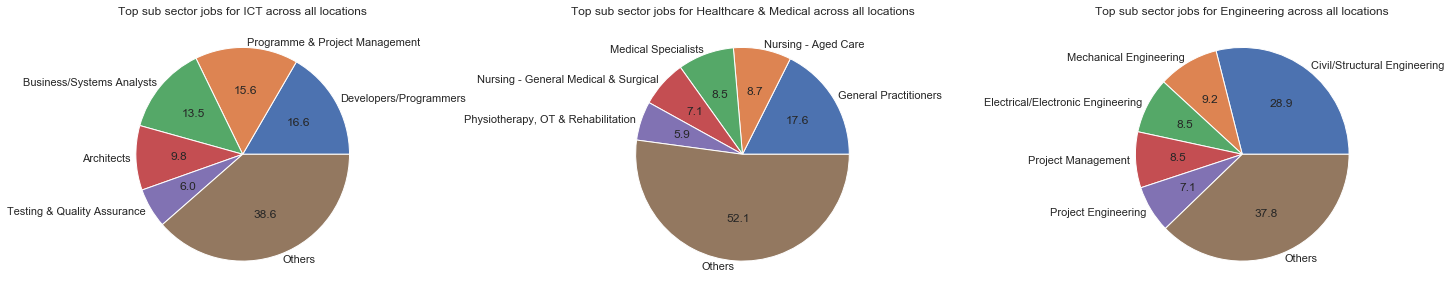

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20), subplot_kw={'aspect':'equal'})
# Set the chart parameters
ax1.set_title('Top sub sector jobs for ICT across all locations')
ax2.set_title('Top sub sector jobs for Healthcare & Medical across all locations')
ax3.set_title('Top sub sector jobs for Engineering across all locations')

#return top 5 sub job sectors in ICT for every location
top_sub1_job_sectors = df[(df['Location'].isin([location1,location2,location3,location4,location5])) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Information & Communication Technology')  ]
top_sub1_job_sectors = top_sub1_job_sectors.groupby('SubClassification').count()
top_sub1_job_sectors['SubClassification'] = top_sub1_job_sectors.index
top_sub1_job_sectors['Count'] = top_sub1_job_sectors["Id"]
top_sub1_job_sectors = top_sub1_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub1_job_sectors_all = top_sub1_job_sectors[:5].copy()

new_row = pd.DataFrame(data = {
    'SubClassification' : ['Others'],
    'Count' : [top_sub1_job_sectors["Count"][5:].sum()]
})
top_sub1_job_sectors_all = pd.concat([top_sub1_job_sectors_all, new_row],sort=False)

#return top 5 sub job sectors in Healthcare & Medical for every location
top_sub2_job_sectors = df[(df['Location'].isin([location1,location2,location3,location4,location5])) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Healthcare & Medical')  ]
top_sub2_job_sectors = top_sub2_job_sectors.groupby('SubClassification').count()
top_sub2_job_sectors['SubClassification'] = top_sub2_job_sectors.index
top_sub2_job_sectors['Count'] = top_sub2_job_sectors["Id"]
top_sub2_job_sectors = top_sub2_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub2_job_sectors_all = top_sub2_job_sectors[:5].copy()

new_row = pd.DataFrame(data = {
    'SubClassification' : ['Others'],
    'Count' : [top_sub2_job_sectors["Count"][5:].sum()]
})
top_sub2_job_sectors_all = pd.concat([top_sub2_job_sectors_all, new_row],sort=False)

#return top 5 sub job sectors in Engineering for every location
top_sub3_job_sectors = df[(df['Location'].isin([location1,location2,location3,location4,location5])) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Engineering')  ]
top_sub3_job_sectors = top_sub3_job_sectors.groupby('SubClassification').count()
top_sub3_job_sectors['SubClassification'] = top_sub3_job_sectors.index
top_sub3_job_sectors['Count'] = top_sub3_job_sectors["Id"]
top_sub3_job_sectors = top_sub3_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub3_job_sectors_all = top_sub3_job_sectors[:5].copy()

new_row = pd.DataFrame(data = {
    'SubClassification' : ['Others'],
    'Count' : [top_sub3_job_sectors["Count"][5:].sum()]
})
top_sub3_job_sectors_all = pd.concat([top_sub3_job_sectors_all, new_row],sort=False)

# Plot the data in a pie chart
ax1.pie(top_sub1_job_sectors_all["Count"], labels=top_sub1_job_sectors_all["SubClassification"], autopct = '%1.1f', labeldistance=1.05)
ax2.pie(top_sub2_job_sectors_all["Count"], labels=top_sub2_job_sectors_all["SubClassification"], autopct = '%1.1f', labeldistance=1.05)
ax3.pie(top_sub3_job_sectors_all["Count"], labels=top_sub3_job_sectors_all["SubClassification"], autopct = '%1.1f', labeldistance=1.05)

plt.tight_layout()

In [24]:
#retrieve top 5 sub sectors for Information & Communication Technology sector for all locations
top_sub1_job_sectors = df[(df['Location'] == location1) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Information & Communication Technology')  ]
top_sub1_job_sectors = top_sub1_job_sectors.groupby('SubClassification').count()
top_sub1_job_sectors['SubClassification'] = top_sub1_job_sectors.index
top_sub1_job_sectors['Count'] = top_sub1_job_sectors["Id"]
top_sub1_job_sectors = top_sub1_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub1_job_sectors_all = top_sub1_job_sectors[:5].copy()


top_sub2_job_sectors = df[(df['Location'] == location2) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Information & Communication Technology')  ]
top_sub2_job_sectors = top_sub2_job_sectors.groupby('SubClassification').count()
top_sub2_job_sectors['SubClassification'] = top_sub2_job_sectors.index
top_sub2_job_sectors['Count'] = top_sub2_job_sectors["Id"]
top_sub2_job_sectors = top_sub2_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub2_job_sectors_all = top_sub2_job_sectors[:5].copy()


top_sub3_job_sectors = df[(df['Location'] == location3) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Information & Communication Technology')  ]
top_sub3_job_sectors = top_sub3_job_sectors.groupby('SubClassification').count()
top_sub3_job_sectors['SubClassification'] = top_sub3_job_sectors.index
top_sub3_job_sectors['Count'] = top_sub3_job_sectors["Id"]
top_sub3_job_sectors = top_sub3_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub3_job_sectors_all = top_sub3_job_sectors[:5].copy()


top_sub4_job_sectors = df[(df['Location'] == location4) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Information & Communication Technology')  ]
top_sub4_job_sectors = top_sub4_job_sectors.groupby('SubClassification').count()
top_sub4_job_sectors['SubClassification'] = top_sub4_job_sectors.index
top_sub4_job_sectors['Count'] = top_sub4_job_sectors["Id"]
top_sub4_job_sectors = top_sub4_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub4_job_sectors_all = top_sub4_job_sectors[:5].copy()


top_sub5_job_sectors = df[(df['Location'] == location5) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Information & Communication Technology')  ]
top_sub5_job_sectors = top_sub5_job_sectors.groupby('SubClassification').count()
top_sub5_job_sectors['SubClassification'] = top_sub5_job_sectors.index
top_sub5_job_sectors['Count'] = top_sub5_job_sectors["Id"]
top_sub5_job_sectors = top_sub5_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub5_job_sectors_all = top_sub5_job_sectors[:5].copy()


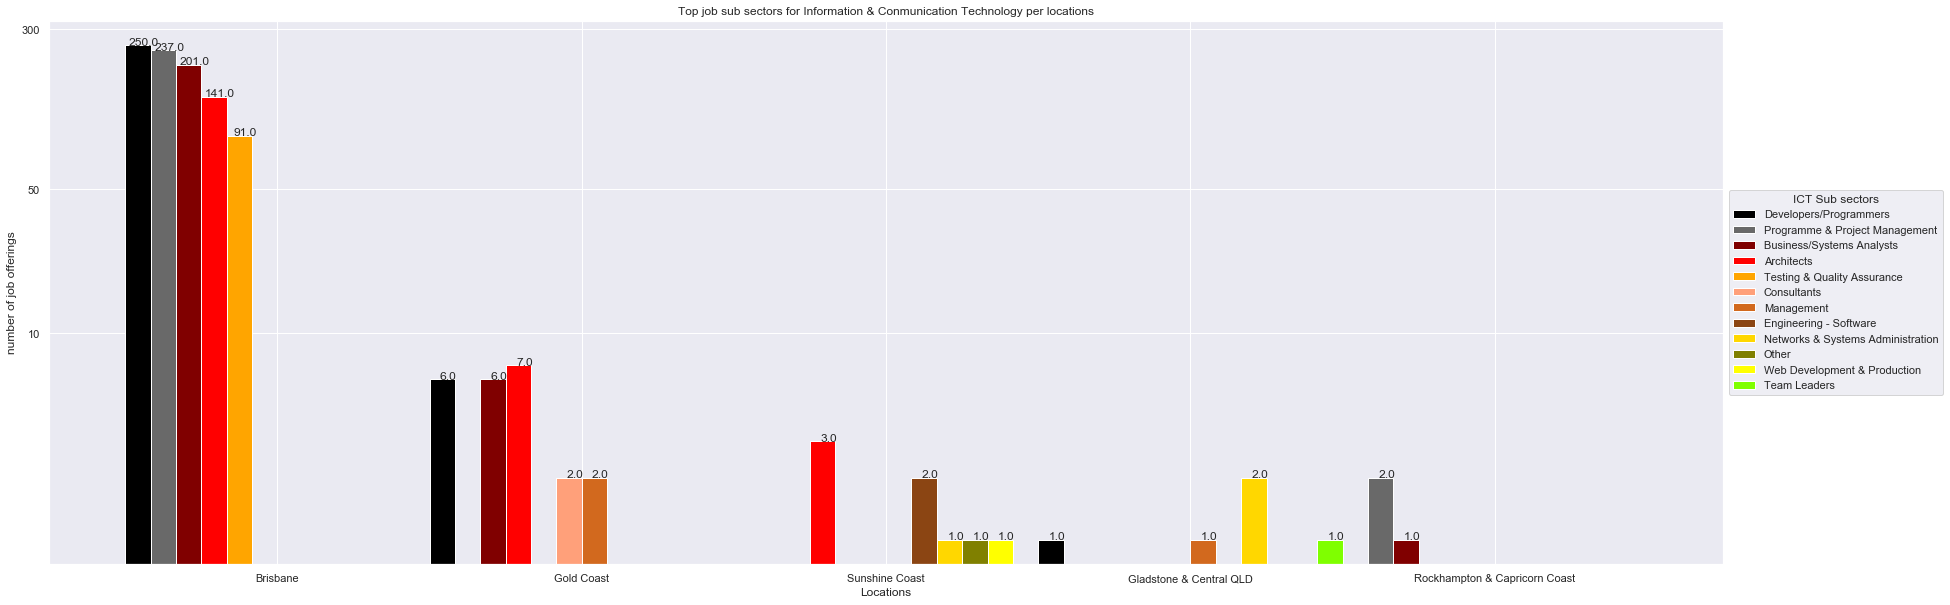

In [25]:
#import library to alter y axis range
import matplotlib.ticker

#create list of jobs for sub sector Healthcare & Medical
jobs = [top_sub1_job_sectors_all["Count"] ,top_sub2_job_sectors_all["Count"] ,top_sub3_job_sectors_all["Count"] ,top_sub4_job_sectors_all["Count"] ,top_sub5_job_sectors_all["Count"] ]
#create new dataframe for jobs
top_5_jobs_all_loc = pd.DataFrame(jobs,index=locations)

#plot bar chart
ax = top_5_jobs_all_loc.plot(kind='bar',figsize=(30,10),width = 1,edgecolor=None, rot = 0, color=['black','dimgray','maroon','red','orange','lightsalmon','chocolate','saddlebrown','gold','olive','yellow','chartreuse','green','turquoise','cyan','deepskyblue','cornflowerblue','mediumslateblue','indigo','fuchsia', 'crimson'])

#alter y axis display range
ax.set_yscale('log')
ax.set_yticks([10, 50, 300])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.title('Top job sub sectors for Information & Conmunication Technology per locations')
plt.xlabel('Locations')
plt.ylabel('number of job offerings')
# Add value labels to bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height >0:
        ax.annotate(height, (x +0.02+ width/2, y + height*1.0), ha='center')
ax.legend(
          title = "ICT Sub sectors",
          loc = "center left",
          bbox_to_anchor = (1,0, 0.5, 1))


In [26]:
#retrieve top 5 sub sectors for Healthcare & Medical sector for all locations
top_sub1_job_sectors = df[(df['Location'] == location1) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Healthcare & Medical')  ]
top_sub1_job_sectors = top_sub1_job_sectors.groupby('SubClassification').count()
top_sub1_job_sectors['SubClassification'] = top_sub1_job_sectors.index
top_sub1_job_sectors['Count'] = top_sub1_job_sectors["Id"]
top_sub1_job_sectors = top_sub1_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub1_job_sectors_all = top_sub1_job_sectors[:5].copy()

top_sub2_job_sectors = df[(df['Location'] == location2) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Healthcare & Medical')  ]
top_sub2_job_sectors = top_sub2_job_sectors.groupby('SubClassification').count()
top_sub2_job_sectors['SubClassification'] = top_sub2_job_sectors.index
top_sub2_job_sectors['Count'] = top_sub2_job_sectors["Id"]
top_sub2_job_sectors = top_sub2_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub2_job_sectors_all = top_sub2_job_sectors[:5].copy()

top_sub3_job_sectors = df[(df['Location'] == location3) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Healthcare & Medical')  ]
top_sub3_job_sectors = top_sub3_job_sectors.groupby('SubClassification').count()
top_sub3_job_sectors['SubClassification'] = top_sub3_job_sectors.index
top_sub3_job_sectors['Count'] = top_sub3_job_sectors["Id"]
top_sub3_job_sectors = top_sub3_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub3_job_sectors_all = top_sub3_job_sectors[:5].copy()

top_sub4_job_sectors = df[(df['Location'] == location4) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Healthcare & Medical')  ]
top_sub4_job_sectors = top_sub4_job_sectors.groupby('SubClassification').count()
top_sub4_job_sectors['SubClassification'] = top_sub4_job_sectors.index
top_sub4_job_sectors['Count'] = top_sub4_job_sectors["Id"]
top_sub4_job_sectors = top_sub4_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub4_job_sectors_all = top_sub4_job_sectors[:5].copy()

top_sub5_job_sectors = df[(df['Location'] == location5) & (df['LowestSalary'] >=80) & (df['Classification'] == 'Healthcare & Medical')  ]
top_sub5_job_sectors = top_sub5_job_sectors.groupby('SubClassification').count()
top_sub5_job_sectors['SubClassification'] = top_sub5_job_sectors.index
top_sub5_job_sectors['Count'] = top_sub5_job_sectors["Id"]
top_sub5_job_sectors = top_sub5_job_sectors.sort_values(by=["Count"], ascending =False)
top_sub5_job_sectors_all = top_sub5_job_sectors[:5].copy()


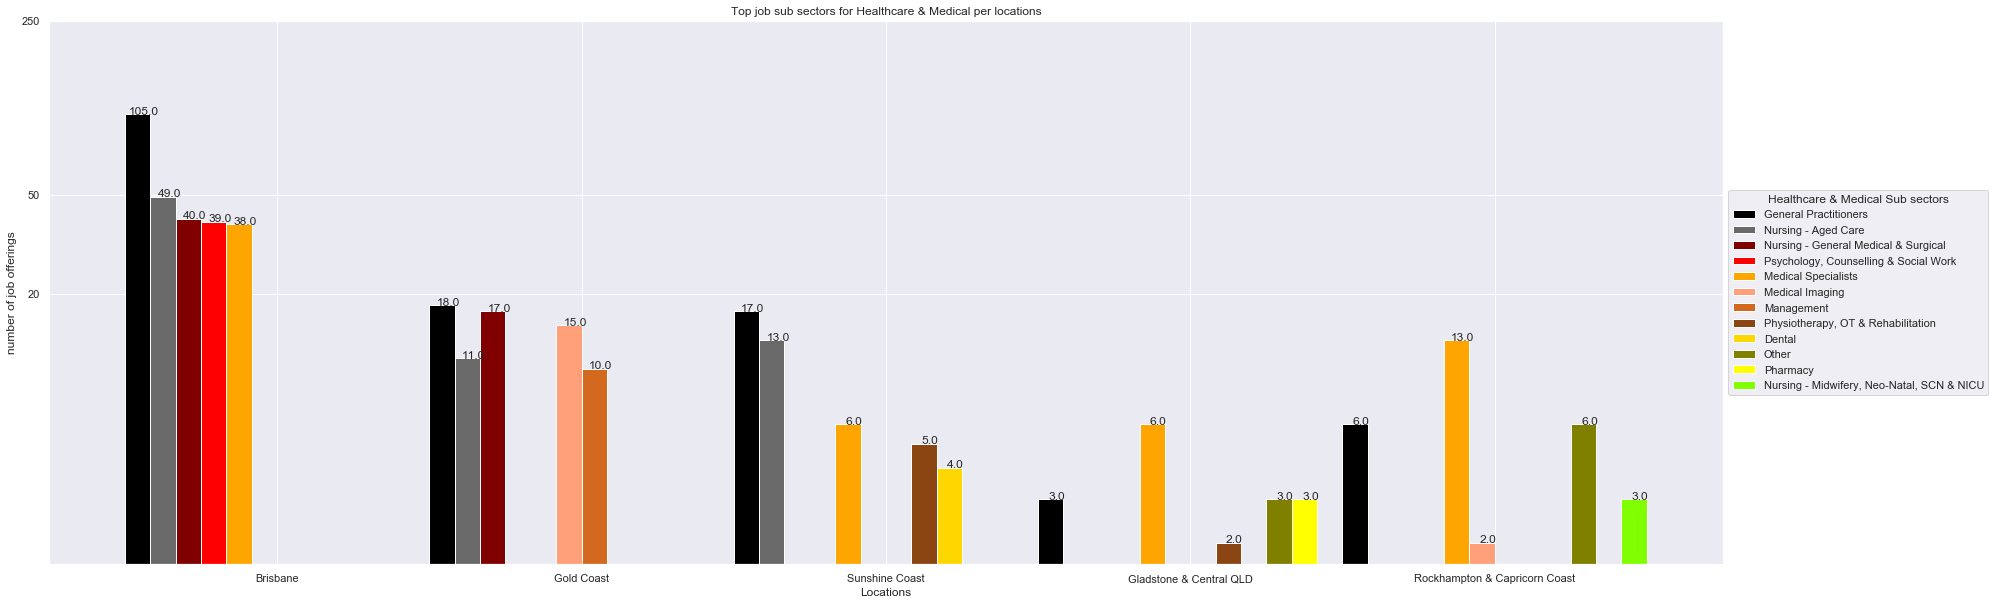

In [27]:

locations = [location1,location2,location3,location4,location5]

#create list of jobs for sub sector Healthcare & Medical
jobs = [top_sub1_job_sectors_all["Count"] ,top_sub2_job_sectors_all["Count"] ,top_sub3_job_sectors_all["Count"] ,top_sub4_job_sectors_all["Count"] ,top_sub5_job_sectors_all["Count"] ]
#create new dataframe for jobs
top_5_jobs_all_loc = pd.DataFrame(jobs,index=locations)

#plot bar chart
ax = top_5_jobs_all_loc.plot(kind='bar',figsize=(30,10),width = 1,edgecolor=None, rot = 0, color=['black','dimgray','maroon','red','orange','lightsalmon','chocolate','saddlebrown','gold','olive','yellow','chartreuse','green','turquoise','cyan','deepskyblue','cornflowerblue','mediumslateblue','indigo','fuchsia', 'crimson'])

#alter y axis display range
ax.set_yscale('log')
ax.set_yticks([20, 50, 250])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.title('Top job sub sectors for Healthcare & Medical per locations')
plt.xlabel('Locations')
plt.ylabel('number of job offerings')
# Add value labels to bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height >0:
        ax.annotate(height, (x +0.02+ width/2, y + height*1.0), ha='center')
ax.legend(
          title = "Healthcare & Medical Sub sectors",
          loc = "center left",
          bbox_to_anchor = (1,0, 0.5, 1))

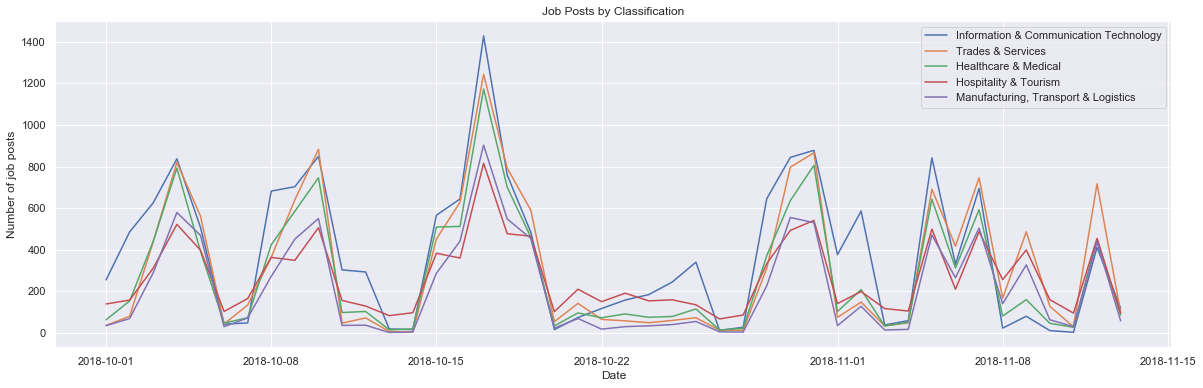

In [28]:
posts_city = df.groupby(df['Classification'])['Title'].count().sort_values(ascending=False)

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize = fig_dims)

for i in range(0, 5):
    loc_date_jobs = df.loc[df['Classification'] == posts_city.keys()[i]].groupby('Date').agg({'Classification': ['count']})
    plt.plot(loc_date_jobs)

plt.legend([posts_city.keys()[i] for i in range(0,5)])

_ = ax.set(title='Job Posts by Classification', xlabel='Date', ylabel='Number of job posts')

In [29]:
# Define linear regression function

def linear_regression(df):
    linear_df = df.copy()
    linear_df['xy'] = linear_df['x'] * linear_df['y']
    linear_df['x_2'] = linear_df['x'] * linear_df['x']
    linear_df['y_2'] = linear_df['y'] * linear_df['y']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()

    b = (linear_sum['xy'] - len(df) * linear_mean['x'] * linear_mean['y']) / (linear_sum['x_2'] - len(df) * linear_mean['x'] * linear_mean['x'])
    a = linear_mean['y'] - b * linear_mean['x']
    return a, b

In [39]:
#Get posts for various sectors
sector_posts = df[['Title', 'Classification']].groupby('Classification').count().sort_values(by=["Title"], ascending=False)
sector_posts

,Title
Classification,
Information & Communication Technology,16661
Trades & Services,14125
Healthcare & Medical,12515
Hospitality & Tourism,11818
"Manufacturing, Transport & Logistics",9608
...,...
Science & Technology,696
"Farming, Animals & Conservation",683
"Advertising, Arts & Media",644


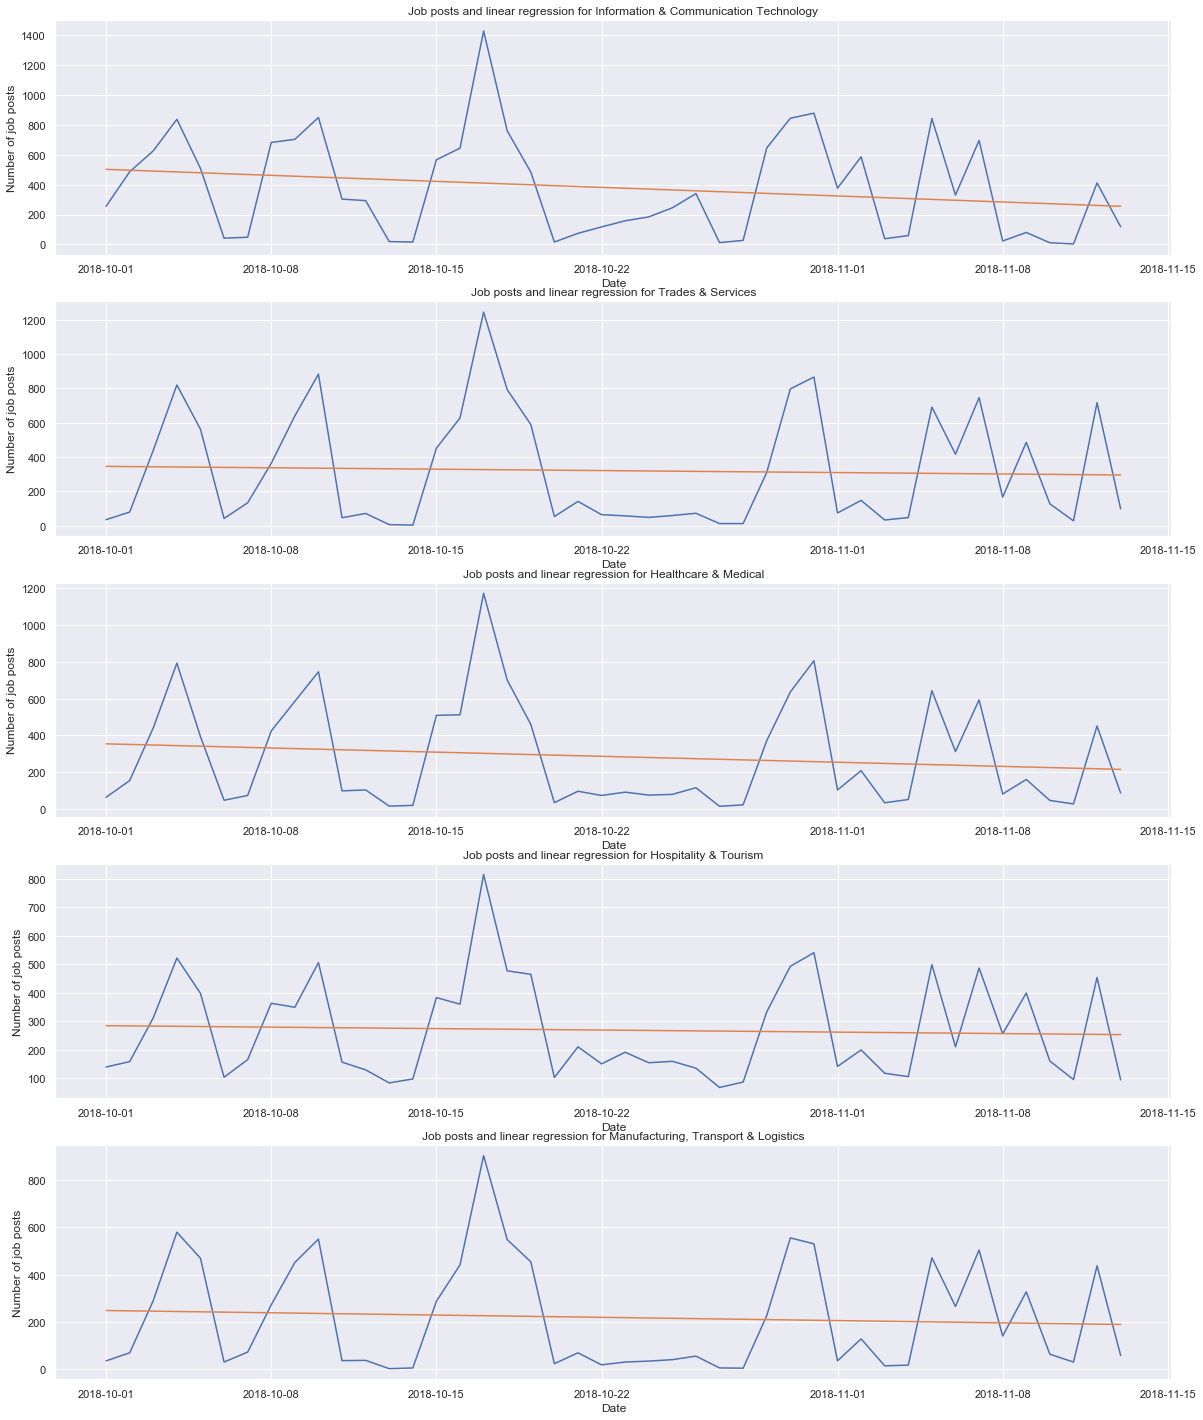

In [53]:
#Find and chart the linear regressions for the top 5 sectors

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(20,5*5))

ax.set(title='Job Posts by Classification', xlabel='Date', ylabel='Number of job posts')

ax1.set(title='Job posts and linear regression for {}'.format(sector_posts.axes[0][0]), xlabel='Date', ylabel='Number of job posts')
ax2.set(title='Job posts and linear regression for {}'.format(sector_posts.axes[0][1]), xlabel='Date', ylabel='Number of job posts')
ax3.set(title='Job posts and linear regression for {}'.format(sector_posts.axes[0][2]), xlabel='Date', ylabel='Number of job posts')
ax4.set(title='Job posts and linear regression for {}'.format(sector_posts.axes[0][3]), xlabel='Date', ylabel='Number of job posts')
ax5.set(title='Job posts and linear regression for {}'.format(sector_posts.axes[0][4]), xlabel='Date', ylabel='Number of job posts')

posts = []
linear = []

for c in sector_posts.axes[0][:5]:
    job_posts = df.loc[df['Classification'] == c].groupby('Date').agg({'Classification': ['count']})

    new_df = pd.DataFrame(columns=['x', 'y'])

    for i, v in enumerate(job_posts.values.tolist()):
        new_df.loc[i] = [i, v[0]]

    a, b = linear_regression(new_df)
    linear_data = job_posts.copy()
    for m in range(0,len(job_posts)):
        linear_data.iloc[m] = a + b * m

    posts.append(job_posts)
    linear.append(linear_data)

ax1.plot(posts[0])
ax1.plot(linear[0])
ax2.plot(posts[1])
ax2.plot(linear[1])
ax3.plot(posts[2])
ax3.plot(linear[2])
ax4.plot(posts[3])
ax4.plot(linear[3])
ax5.plot(posts[4])
ax5.plot(linear[4])

In [44]:
#Get posts for various subsectors of IT
it_sub_posts = df[['Title', 'SubClassification']].loc[df['Classification'] == 'Information & Communication Technology'].groupby('SubClassification').count().sort_values(by=["Title"], ascending=False)
it_sub_posts[:10]

,Title
SubClassification,
Developers/Programmers,3069
Business/Systems Analysts,2076
Programme & Project Management,1665
Architects,1110
Engineering - Software,1087
Help Desk & IT Support,1074
Networks & Systems Administration,927
Consultants,849
Other,742


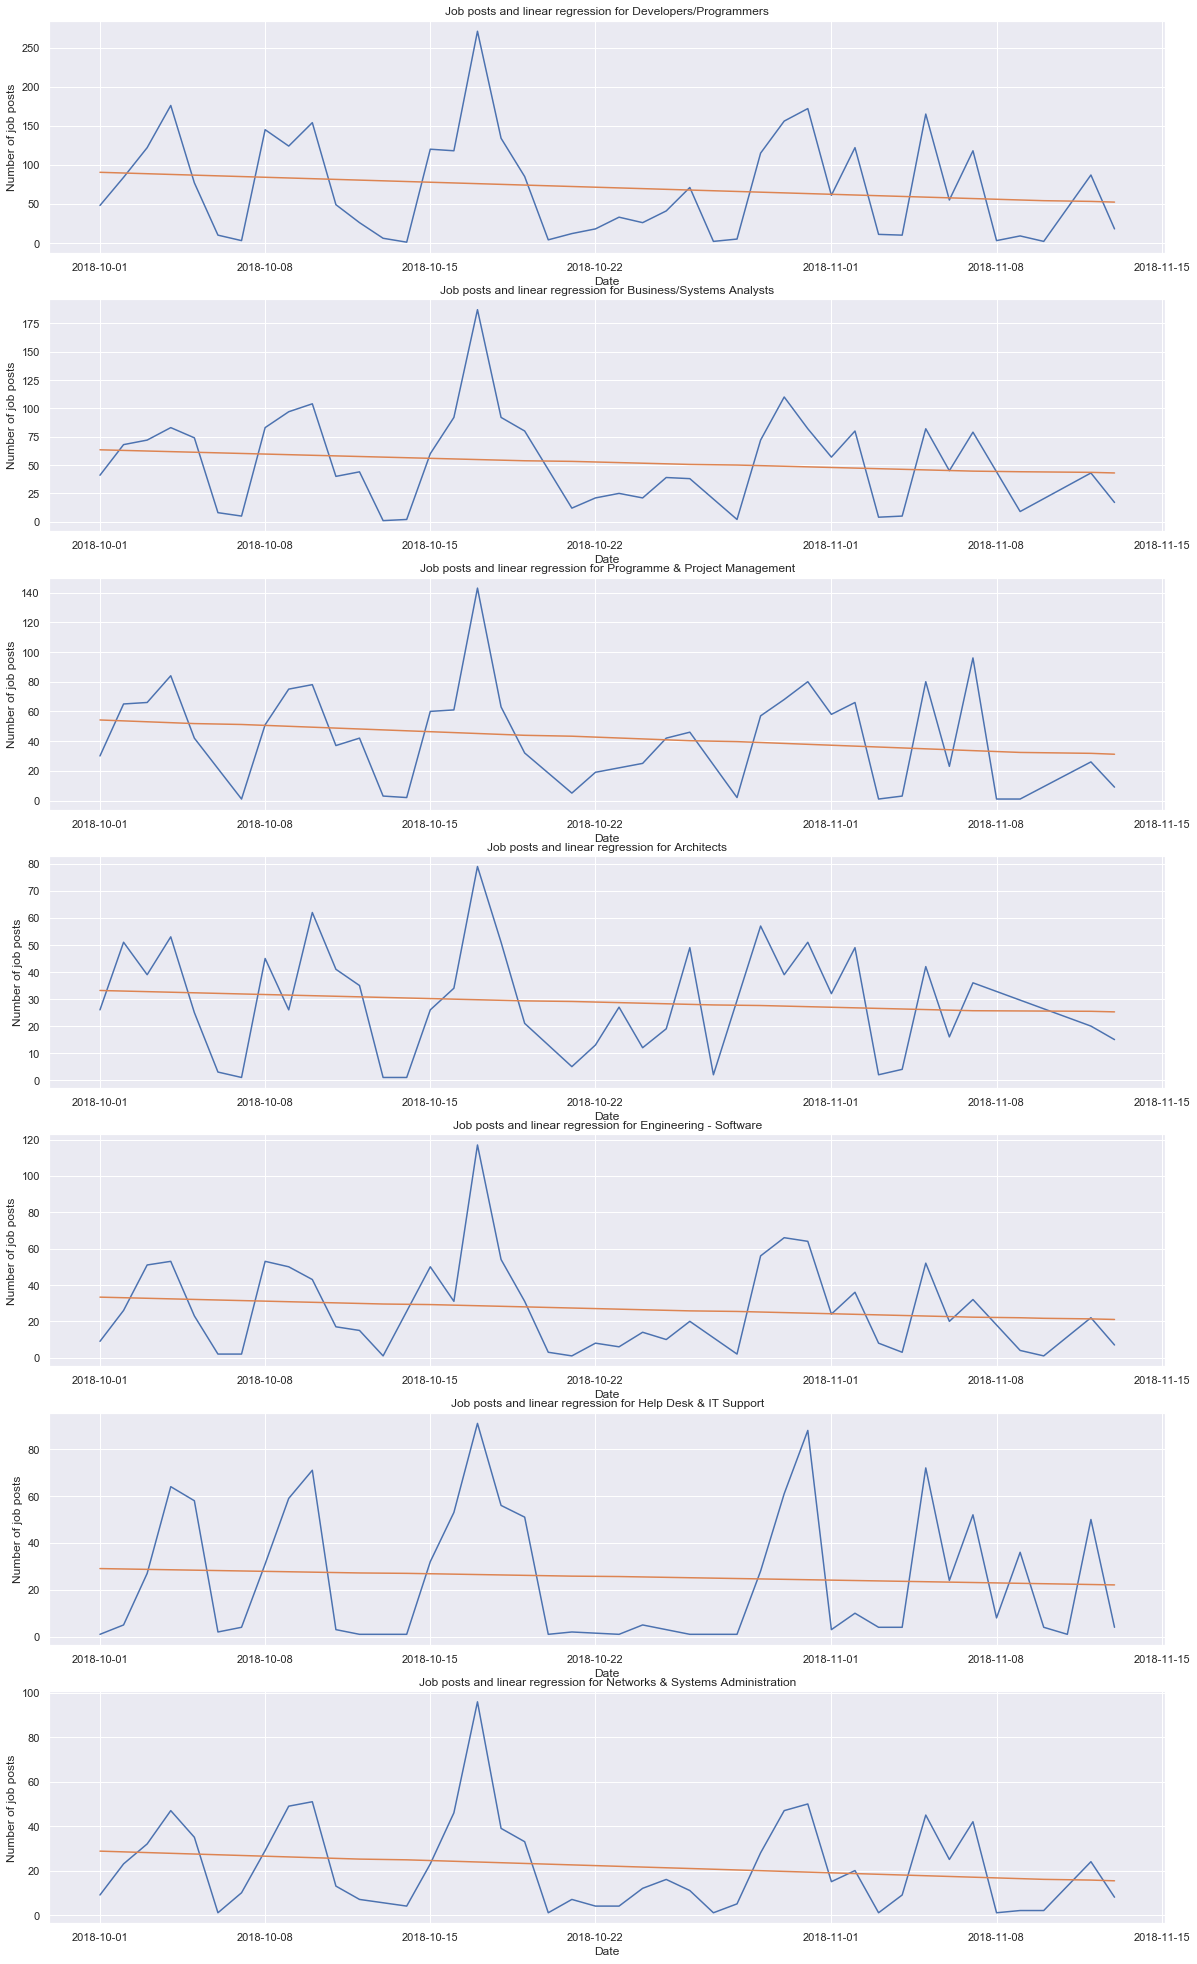

In [51]:
#Find and chart the linear regressions for the top 7 subsectors of IT

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(20,5*7))

ax.set(title='Job Posts by Classification', xlabel='Date', ylabel='Number of job posts')

ax1.set(title='Job posts and linear regression for {}'.format(it_sub_posts.axes[0][0]), xlabel='Date', ylabel='Number of job posts')
ax2.set(title='Job posts and linear regression for {}'.format(it_sub_posts.axes[0][1]), xlabel='Date', ylabel='Number of job posts')
ax3.set(title='Job posts and linear regression for {}'.format(it_sub_posts.axes[0][2]), xlabel='Date', ylabel='Number of job posts')
ax4.set(title='Job posts and linear regression for {}'.format(it_sub_posts.axes[0][3]), xlabel='Date', ylabel='Number of job posts')
ax5.set(title='Job posts and linear regression for {}'.format(it_sub_posts.axes[0][4]), xlabel='Date', ylabel='Number of job posts')
ax6.set(title='Job posts and linear regression for {}'.format(it_sub_posts.axes[0][5]), xlabel='Date', ylabel='Number of job posts')
ax7.set(title='Job posts and linear regression for {}'.format(it_sub_posts.axes[0][6]), xlabel='Date', ylabel='Number of job posts')

posts = []
linear = []

for c in it_sub_posts.axes[0][:7]:
    job_posts = df.loc[(df['Classification'] == 'Information & Communication Technology') & (df['SubClassification'] == c)].groupby('Date').agg({'SubClassification': ['count']})

    new_df = pd.DataFrame(columns=['x', 'y'])

    for i, v in enumerate(job_posts.values.tolist()):
        new_df.loc[i] = [i, v[0]]

    a, b = linear_regression(new_df)
    linear_data = job_posts.copy()
    for m in range(0,len(job_posts)):
        linear_data.iloc[m] = a + b * m

    posts.append(job_posts)
    linear.append(linear_data)

ax1.plot(posts[0])
ax1.plot(linear[0])
ax2.plot(posts[1])
ax2.plot(linear[1])
ax3.plot(posts[2])
ax3.plot(linear[2])
ax4.plot(posts[3])
ax4.plot(linear[3])
ax5.plot(posts[4])
ax5.plot(linear[4])
ax6.plot(posts[5])
ax6.plot(linear[5])
ax7.plot(posts[6])
ax7.plot(linear[6])

In [52]:
#Get posts for various subsectors of Health
health_sub_posts = df[['Title', 'SubClassification']].loc[df['Classification'] == 'Healthcare & Medical'].groupby('SubClassification').count().sort_values(by=["Title"], ascending=False)
health_sub_posts[:10]

,Title
SubClassification,
Nursing - Aged Care,1573
"Physiotherapy, OT & Rehabilitation",1397
"Psychology, Counselling & Social Work",855
Nursing - General Medical & Surgical,810
General Practitioners,799
Dental,716
Pharmacy,639
Other,630
Medical Administration,616


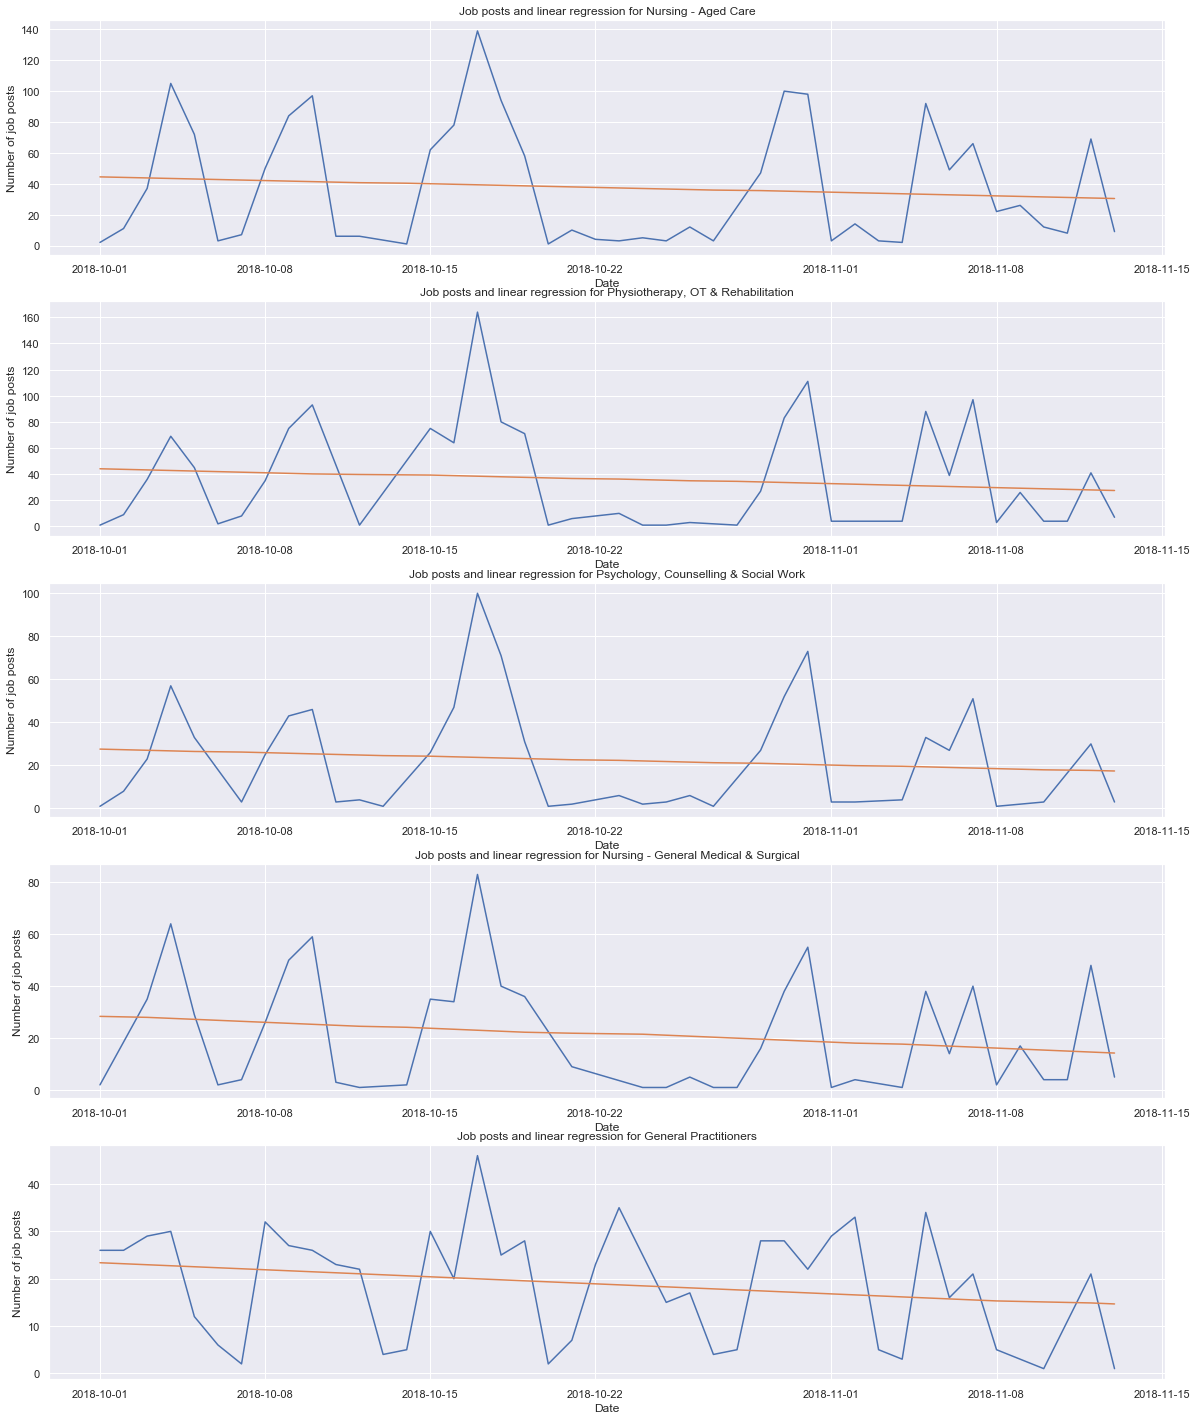

In [55]:
#Find and chart the linear regressions for the top 5 subsectors of Health

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(20,5*5))

ax.set(title='Job Posts by Classification', xlabel='Date', ylabel='Number of job posts')

ax1.set(title='Job posts and linear regression for {}'.format(health_sub_posts.axes[0][0]), xlabel='Date', ylabel='Number of job posts')
ax2.set(title='Job posts and linear regression for {}'.format(health_sub_posts.axes[0][1]), xlabel='Date', ylabel='Number of job posts')
ax3.set(title='Job posts and linear regression for {}'.format(health_sub_posts.axes[0][2]), xlabel='Date', ylabel='Number of job posts')
ax4.set(title='Job posts and linear regression for {}'.format(health_sub_posts.axes[0][3]), xlabel='Date', ylabel='Number of job posts')
ax5.set(title='Job posts and linear regression for {}'.format(health_sub_posts.axes[0][4]), xlabel='Date', ylabel='Number of job posts')

posts = []
linear = []

for c in health_sub_posts.axes[0][:7]:
    job_posts = df.loc[(df['Classification'] == 'Healthcare & Medical') & (df['SubClassification'] == c)].groupby('Date').agg({'SubClassification': ['count']})

    new_df = pd.DataFrame(columns=['x', 'y'])

    for i, v in enumerate(job_posts.values.tolist()):
        new_df.loc[i] = [i, v[0]]

    a, b = linear_regression(new_df)
    linear_data = job_posts.copy()
    for m in range(0,len(job_posts)):
        linear_data.iloc[m] = a + b * m

    posts.append(job_posts)
    linear.append(linear_data)

ax1.plot(posts[0])
ax1.plot(linear[0])
ax2.plot(posts[1])
ax2.plot(linear[1])
ax3.plot(posts[2])
ax3.plot(linear[2])
ax4.plot(posts[3])
ax4.plot(linear[3])
ax5.plot(posts[4])
ax5.plot(linear[4])